# Importing Libraries and Loading Data

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
# Loading dataset
data = pd.read_csv("data.csv", skiprows=4).iloc[:, :-1]
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,43864.000000,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.849393,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102112.000000,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.810231,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045


# Getting Data of Interest

In [3]:
# FIlling missing values
data.fillna(0, inplace=True)

In [4]:
fields = ['Population, total',
          'Renewable electricity output (% of total electricity output)',
        'Electricity production from oil sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from coal sources (% of total)']

df = data[data["Indicator Name"].isin(fields)]

In [5]:
# Dropping records that are not for Countries
not_country = ['Euro area', 'IDA blend',
    'Middle East & North Africa (excluding high income)',
    'Africa Western and Central',
    'Middle East & North Africa (IDA & IBRD countries)',
    'Central Europe and the Baltics',
    'Middle East & North Africa (IDA & IBRD countries)'
    'Middle East & North Africa', "Arab World",
    'Europe & Central Asia (excluding high income)',
    'Africa Eastern and Southern', 'Low income',
    'Latin America & Caribbean (excluding high income)',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Heavily indebted poor countries (HIPC)', 'European Union',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Latin America & Caribbean', 'Pre-demographic dividend',
    'Fragile and conflict affected situations',
    'Least developed countries: UN classification',
    'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
    'Sub-Saharan Africa (IDA & IBRD countries)', 'IDA only',
    'Europe & Central Asia', 'IDA total',
    'Post-demographic dividend', 'High income', 'OECD members',
    'South Asia (IDA & IBRD)', 'South Asia',
    'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific (excluding high income)', 'East Asia & Pacific',
    'Late-demographic dividend', 'Upper middle income',
    'Lower middle income', 'Early-demographic dividend', 'IBRD only',
    'Middle income', 'Low & middle income', 'IDA & IBRD total', 'World']

df = df[~df["Country Name"].isin(not_country)]

In [6]:
# Dropping Unnecessary Issues
df.drop(["Country Code", "Indicator Code"], axis=1, inplace=True)

# Analysis

In [7]:
avg_population = df[df["Indicator Name"] == "Population, total"].drop(["Indicator Name"], axis=1).set_index("Country Name").mean(axis=1)
avg_oil_elec = df[df["Indicator Name"] == 'Electricity production from oil sources (% of total)'].drop(["Indicator Name"], axis=1).set_index("Country Name").mean(axis=1)
avg_nuc_elec = df[df["Indicator Name"] == 'Electricity production from nuclear sources (% of total)'].drop(["Indicator Name"], axis=1).set_index("Country Name").mean(axis=1)
avg_gas_elec = df[df["Indicator Name"] == 'Electricity production from natural gas sources (% of total)'].drop(["Indicator Name"], axis=1).set_index("Country Name").mean(axis=1)
avg_hyd_elec = df[df["Indicator Name"] == 'Electricity production from hydroelectric sources (% of total)'].drop(["Indicator Name"], axis=1).set_index("Country Name").mean(axis=1)
avg_coal_elec = df[df["Indicator Name"] == 'Electricity production from coal sources (% of total)'].drop(["Indicator Name"], axis=1).set_index("Country Name").mean(axis=1)
avg_renew_elec = df[df["Indicator Name"] == 'Renewable electricity output (% of total electricity output)'].drop(["Indicator Name"], axis=1).set_index("Country Name").mean(axis=1)

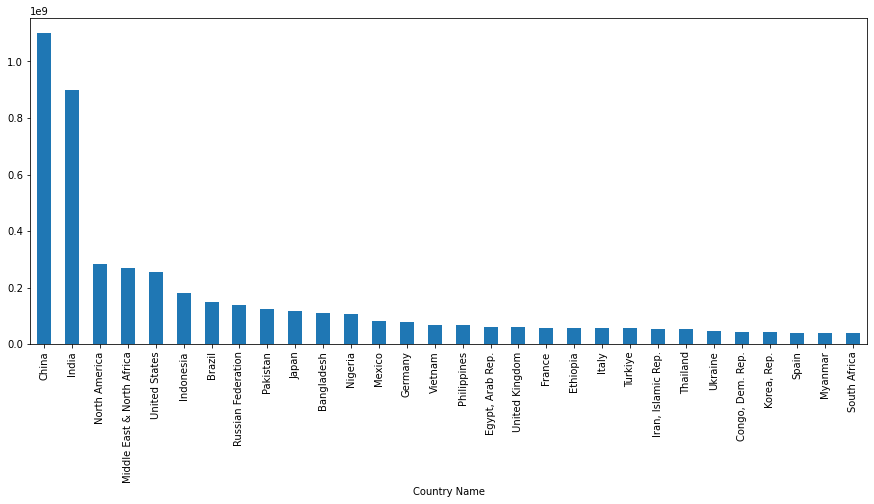

In [8]:
avg_population.sort_values(ascending=False)[:30].plot(kind="bar", figsize=(15, 6))
plt.show()

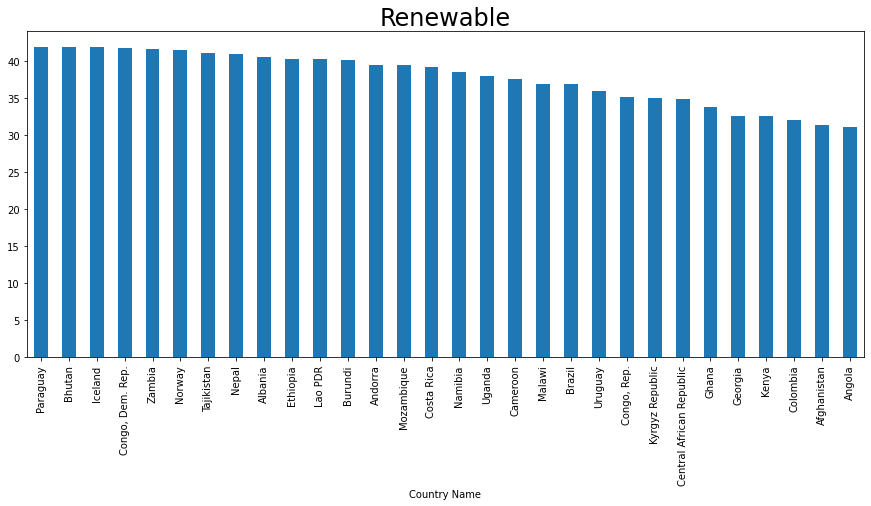

In [9]:
avg_renew_elec.sort_values(ascending=False)[:30].plot(kind="bar", figsize=(15, 6))
plt.title("Renewable", fontsize=24)
plt.show()

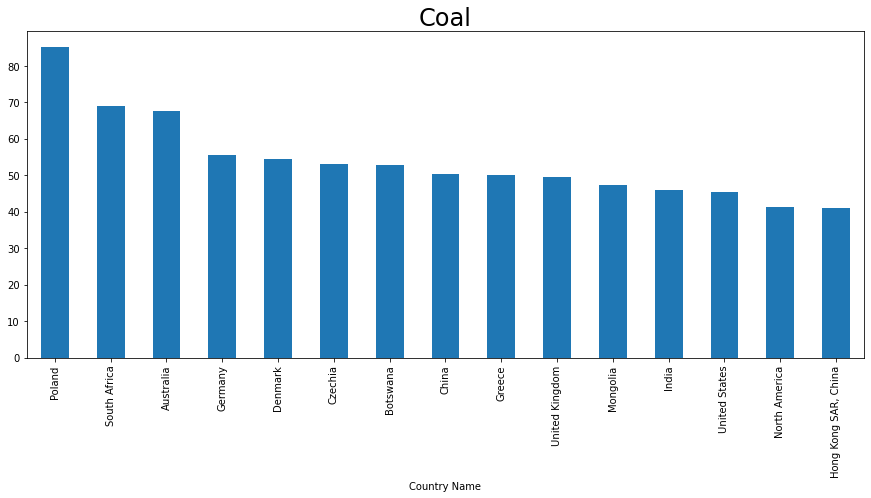

In [10]:
avg_coal_elec.sort_values(ascending=False)[:15].plot(kind="bar", figsize=(15, 6))
plt.title("Coal", fontsize=24)
plt.show()

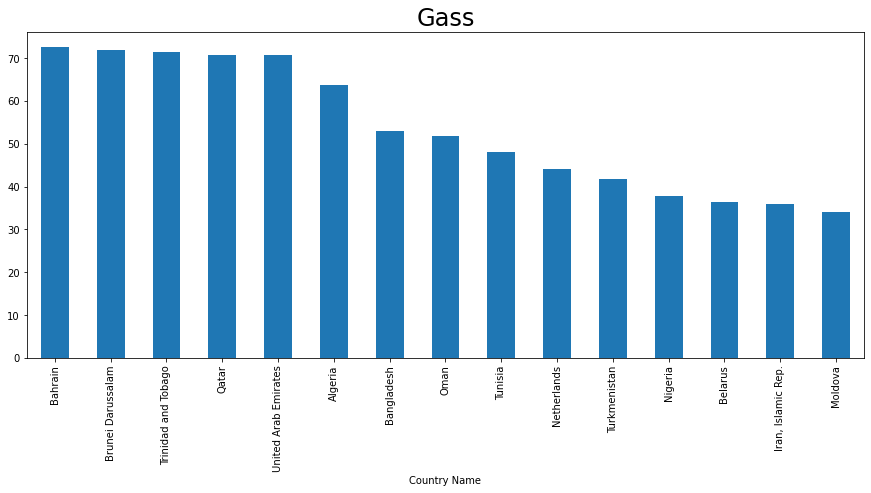

In [11]:
avg_gas_elec.sort_values(ascending=False)[:15].plot(kind="bar", figsize=(15, 6))
plt.title("Gass", fontsize=24)
plt.show()

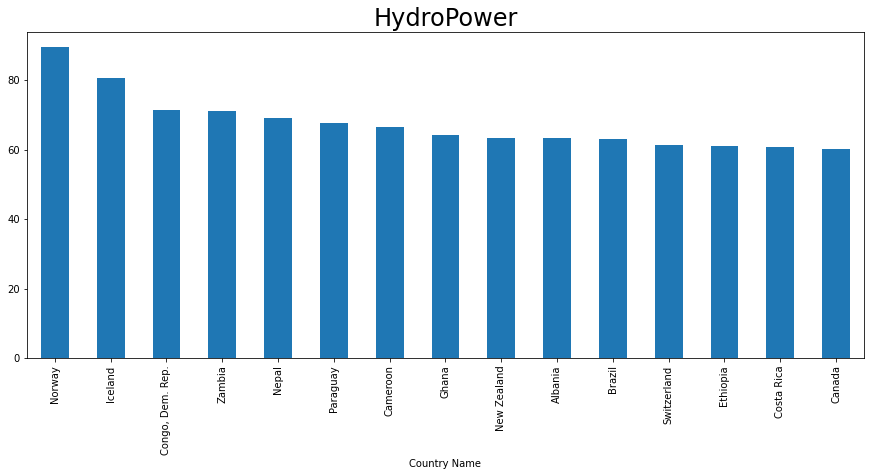

In [12]:
avg_hyd_elec.sort_values(ascending=False)[:15].plot(kind="bar", figsize=(15, 6))
plt.title("HydroPower", fontsize=24)
plt.show()

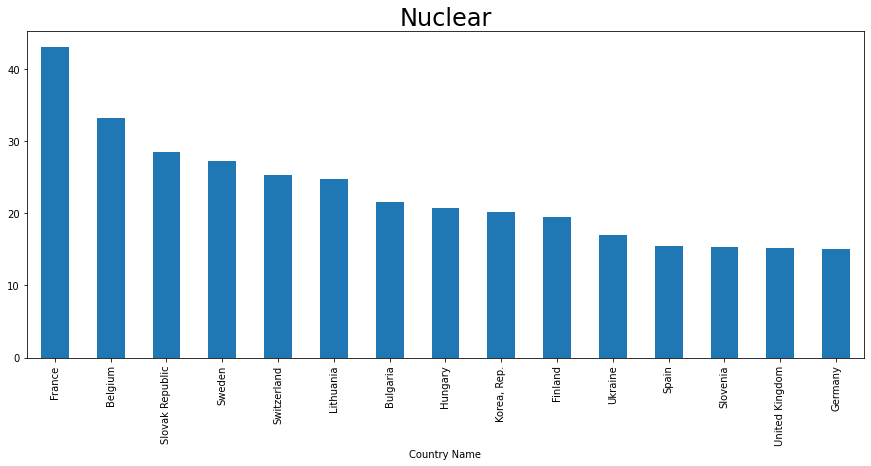

In [13]:
avg_nuc_elec.sort_values(ascending=False)[:15].plot(kind="bar", figsize=(15, 6))
plt.title("Nuclear", fontsize=24)
plt.show()

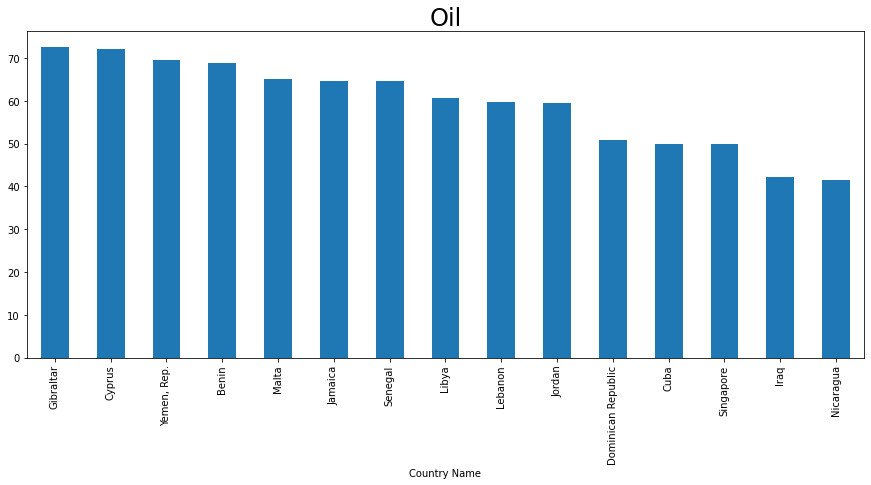

In [14]:
avg_oil_elec.sort_values(ascending=False)[:15].plot(kind="bar", figsize=(15, 6))
plt.title("Oil", fontsize=24)
plt.show()

In [15]:
temp = pd.DataFrame(avg_coal_elec)
temp.columns = ["Coal"]
temp["Gass"] = avg_gas_elec
temp["Hydro"] = avg_gas_elec
temp["Nueclear"] = avg_gas_elec
temp["Oil"] = avg_gas_elec
temp["renew"] = avg_renew_elec
temp = temp.sort_values(by=["Coal", "Gass", "Hydro", "Nueclear", "Oil"], ascending=False)

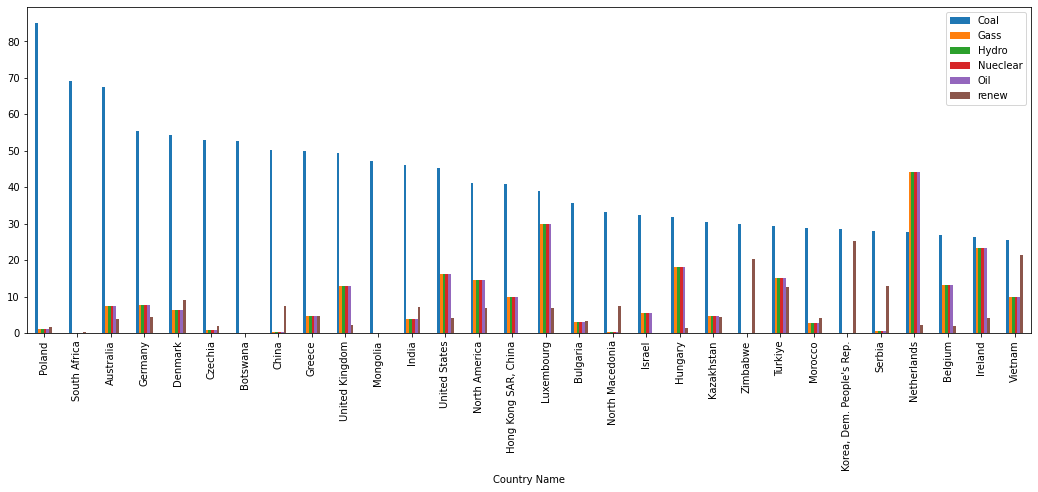

In [16]:
temp.head(30).plot(kind="bar", figsize=(18, 6))
plt.show()

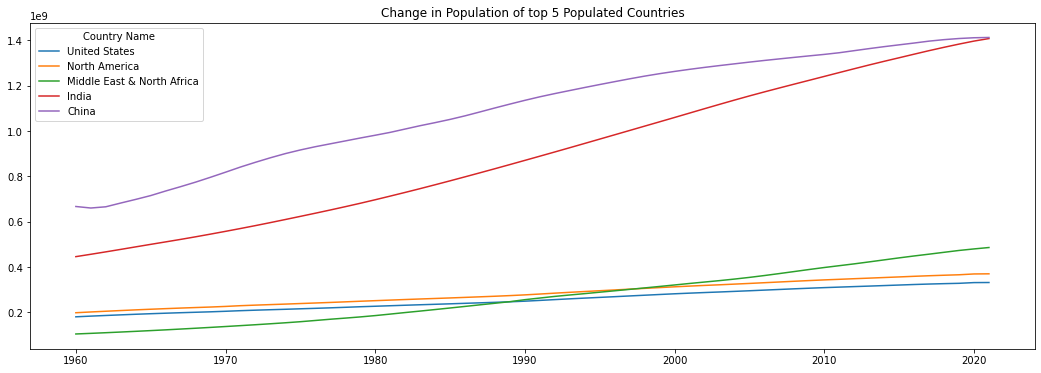

In [17]:
df[df["Indicator Name"] == "Population, total"].drop("Indicator Name", axis=1).set_index("Country Name").sort_values("2021").tail(5).T.plot(kind="line", figsize=(18, 6))
plt.title("Change in Population of top 5 Populated Countries")
plt.show()

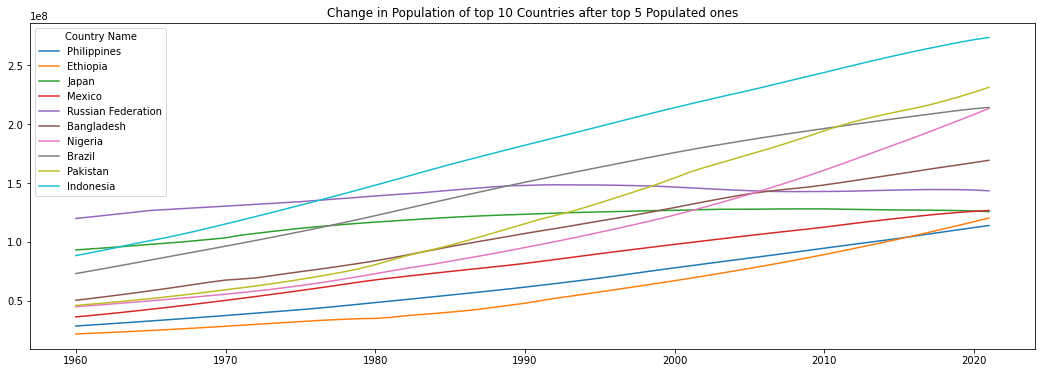

In [18]:
df[df["Indicator Name"] == "Population, total"].drop("Indicator Name", axis=1).set_index("Country Name").sort_values("2021").tail(15).head(10).T.plot(kind="line", figsize=(18, 6))
plt.title("Change in Population of top 10 Countries after top 5 Populated ones")
plt.show()

# Clustering

In [19]:
df_new = df.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_new["Indicator Name"] = encoder.fit_transform(df_new["Indicator Name"])

In [21]:
# X = df_new.iloc[:, 32:]
# X["Country"] = df_new["Country Name"]
# X.set_index("Country", inplace=True)

In [22]:
X = df[df["Indicator Name"] == "Renewable electricity output (% of total electricity output)"].set_index("Country Name").drop("Indicator Name", axis=1)

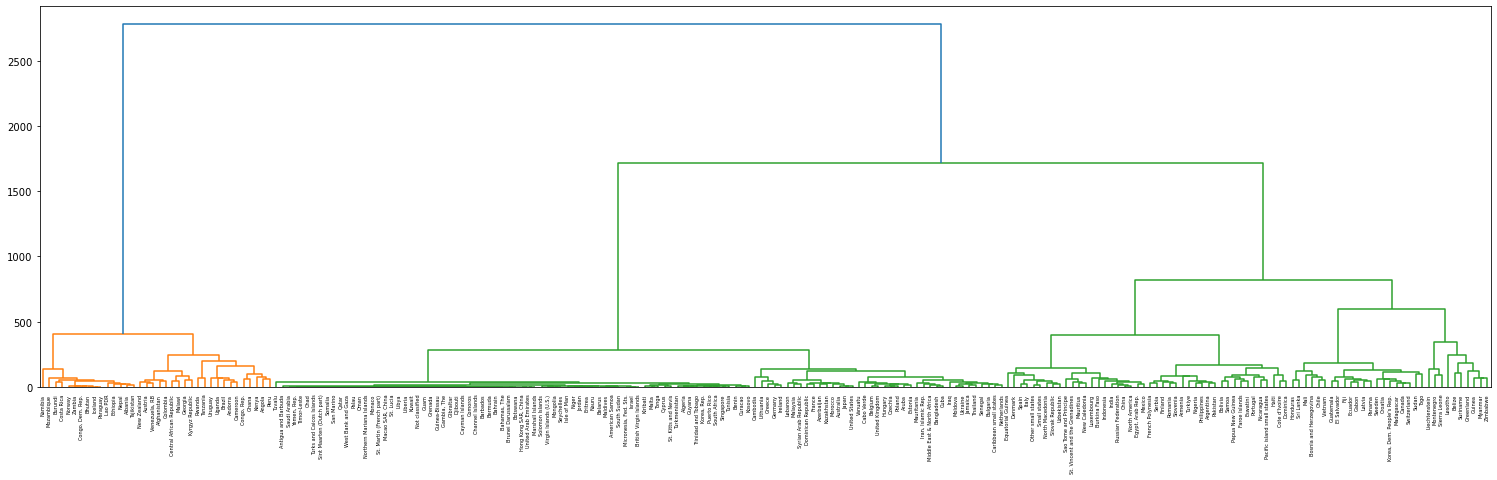

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate example data
data, labels = make_blobs(n_samples=50, centers=3, random_state=0)

# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)

# Create linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(26, 7))
dendrogram(Z, labels=X.index)
plt.show()

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

y_pred = kmeans.predict(X)

In [26]:
X["cluster"] = y_pred

<AxesSubplot:>

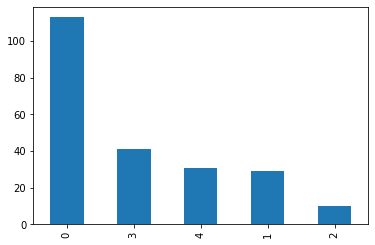

In [29]:
X.cluster.value_counts().plot(kind="bar")

In [37]:
ind_1 = X[X.cluster == 1].index[:10]
ind_2 = X[X.cluster == 2].index[:10]
ind_3 = X[X.cluster == 3].index[:10]
ind_4 = X[X.cluster == 4].index[:10]

In [38]:
pd.DataFrame({"CLuster 1": ind_1, "CLuster 2": ind_2, "CLuster 3": ind_3, "CLuster 4": ind_4})

,CLuster 1,CLuster 2,CLuster 3,CLuster 4
0,Afghanistan,Belize,Argentina,Angola
1,Albania,Guinea,Armenia,Austria
2,Andorra,Greenland,Burkina Faso,Bosnia and Herzegovina
3,Burundi,Liechtenstein,China,Bolivia
4,Brazil,Lesotho,Cote d'Ivoire,Canada
5,Bhutan,Myanmar,Dominica,Switzerland
6,Central African Republic,Montenegro,Denmark,Chile
7,Cameroon,Sierra Leone,"Egypt, Arab Rep.",Ecuador
8,"Congo, Dem. Rep.",Suriname,Spain,Fiji
9,"Congo, Rep.",Zimbabwe,Finland,Gabon
